In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [2]:
record_aux = ["P1s", "P2s", "P4s", "P16s", "P64s"]
Offset_list = ["0.5Ek", "Ek", "3Ek"]
period_list = [1,2,4,16,64]
frequency_list = [1/period for period in period_list]
record_list = []

for offset in Offset_list:
    record_list.append([f"{offset}_{record}"for record in record_aux])

name_list = ["20230906_bode_multi_offset", "20230907_bode_multi_offset", "20230908_bode_multi_offset"]
calibs_list = [0.3453825, 0.349775, 0.26779] # Fmax
name = name_list[2]
calib = calibs_list[2]


In [5]:
manip = []
for i in range(len(Offset_list)):
    manip.append(bc.BodeClass_PSI(name, record_list[i], frequency_list, calib, time_start=30, median_filtering_window_size=2, padding=False,pic_search_window=2))


TypeError: cannot unpack non-iterable NoneType object

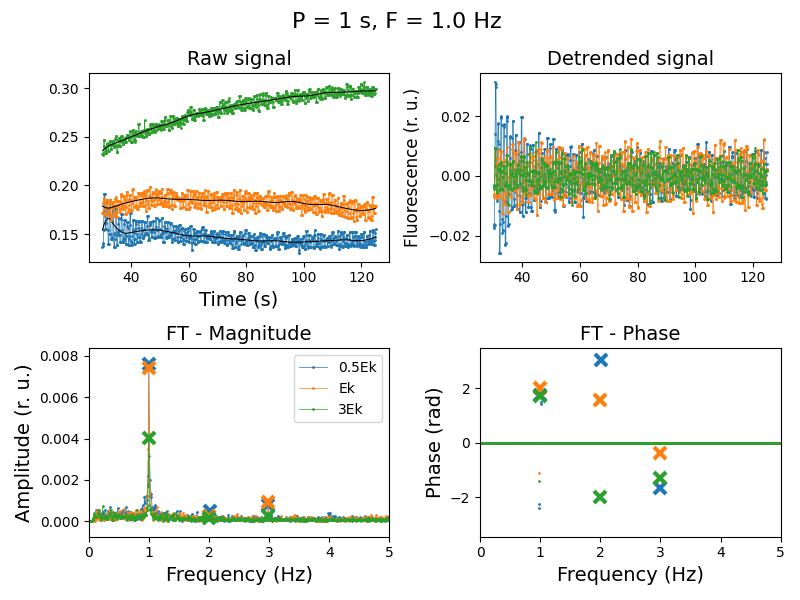

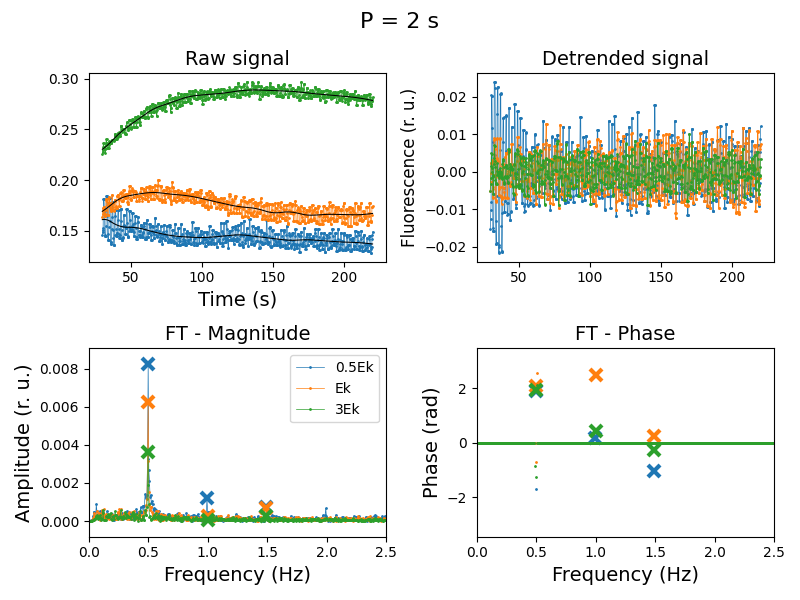

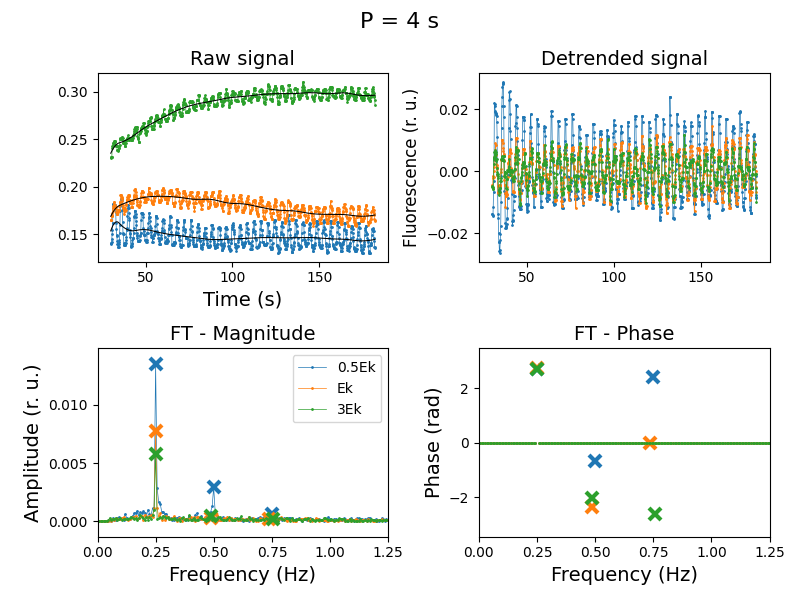

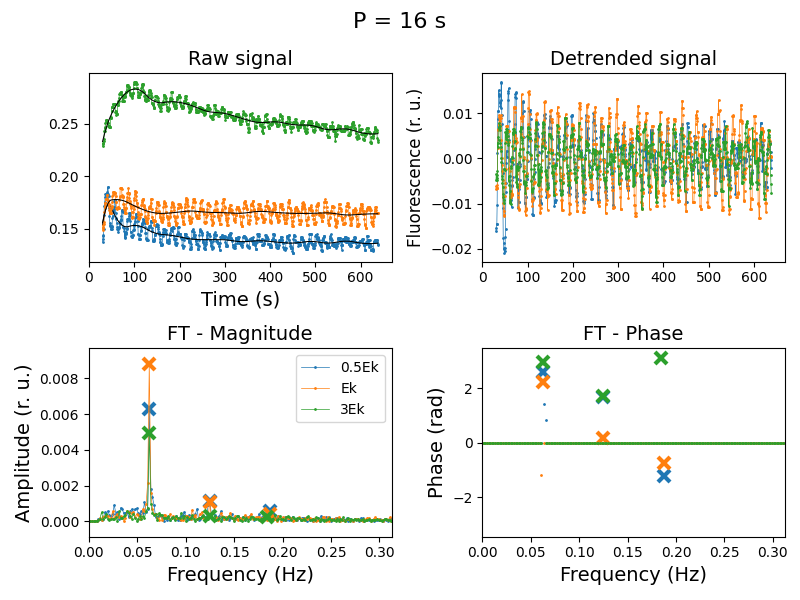

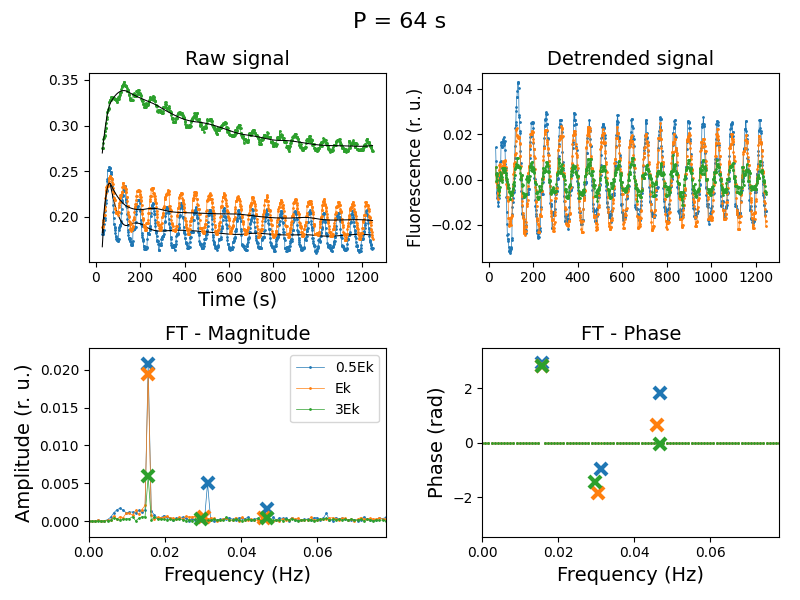

In [8]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/Experiments"

fig, ax = bode_tools.compare_bode(frequency_list, manip, autoscale = True, max = 5, leg = Offset_list)

ax[0].set_xlim(100, 125)

fig.savefig(f"{folder}/data_multi_fluo.png", dpi=300)

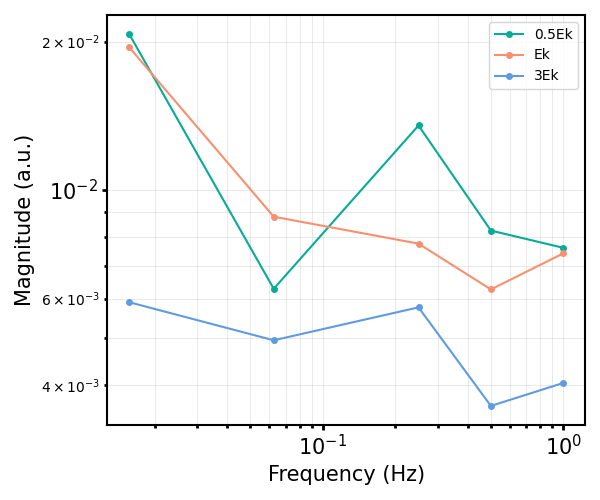

In [11]:
line = 2.5
marker = 4

colors = [dc.colors.rgb.iloc[i] for i in [1,5,10]]

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"

for i, offsets in enumerate(manip):
    ax.plot(offsets.harmonics.f_input, offsets.harmonics["A_0"], "o-", markersize=marker, color = colors[i], label = Offset_list[i])
ax = tools.bode_plot_axes(ax)
ax.legend()
fig.tight_layout()

fig.savefig(manip[2].fig_folder + "/fundamental_bode.png", dpi=300)
    

In [6]:
repeat = []
for j in range(len(name_list)):
    manip = []
    for i in range(len(Offset_list)):
        manip.append(bc.BodeClass(name_list[j], record_list[i], frequency_list, calib, time_start=30, median_filtering_windos_size=0, windowing="flat-top", padding=False,pic_search_window=2))
    repeat.append(manip)

In [7]:
repeat[1][0].fund_amp

[6.165661361984135,
 7.771641275295993,
 6.531409424028423,
 3.3321049371729323,
 13.731445779387037]

In [8]:
line = 2.5
marker = 4

colors = [dc.colors.rgb.iloc[i] for i in [1,5,10]]

frequencies = [[None for k in range(len(Offset_list))] for j in range(len(name_list))]
amplitudes =  [[None for k in range(len(Offset_list))] for j in range(len(name_list))]

for i, replicate in enumerate(repeat):
    for j, offsets in enumerate(replicate):
        frequencies[i][j] = offsets.fund_freq
        amplitudes[i][j] = offsets.fund_amp
        
frequencies = np.array(frequencies) # shape (replicates, offsets, frequencies)
amplitudes = np.array(amplitudes) # shape (replicates, offsets, frequencies)

avg_freq = np.mean(frequencies, axis = 0) # shape (offsets, frequencies)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


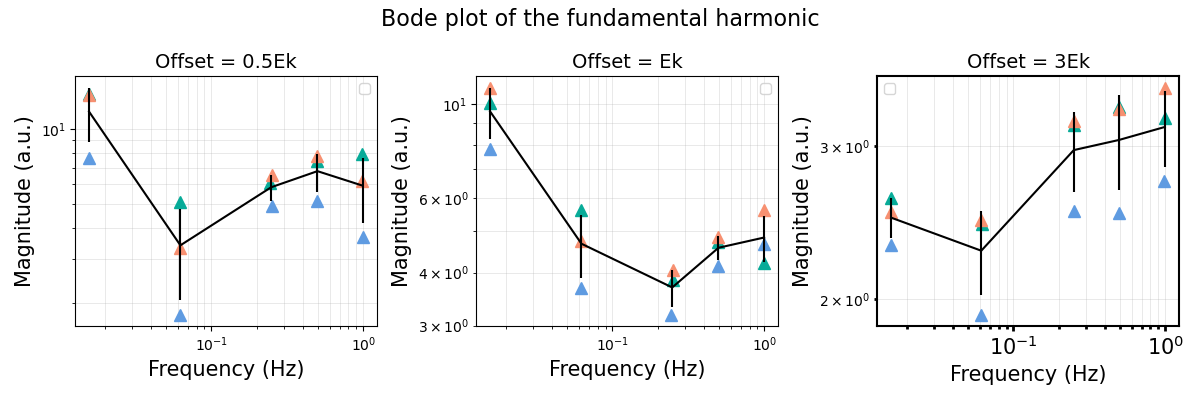

In [9]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig_title = "Bode plot of the fundamental harmonic"
fig.suptitle(fig_title, fontsize = 16)


for j in range(len(Offset_list)):
    
    for i in range(len(name_list)):
        ax[j].plot(frequencies[i][j], amplitudes[i][j], "^", markersize=8, linewidth = 1, color = colors[i])
    ax[j].errorbar(avg_freq[j], avg_amp[j], xerr=std_freq[j], fmt ='', linestyle = '-', linewidth = 1.5, yerr=std_amp[j], capsize=0, capthick=1.5, color = 'k')
[tools.bode_plot_axes(ax) for ax in ax]
[ax.set_title(f"Offset = {Offset_list[i]}", fontsize = 14) for i, ax in enumerate(ax)]

#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates.png", dpi=300)

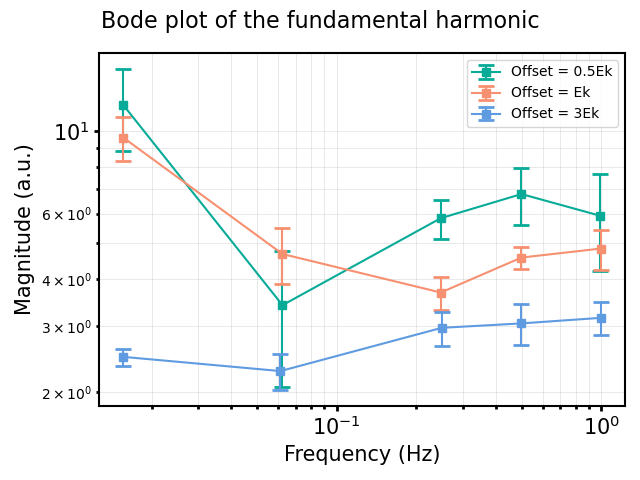

In [10]:
fig, ax = plt.subplots()
fig_title = "Bode plot of the fundamental harmonic"
fig.suptitle(fig_title, fontsize = 16)

for j in range(len(Offset_list)):
    ax.errorbar(avg_freq[j], avg_amp[j], xerr=None, fmt ='s', linestyle = '-', linewidth = 1.5, yerr=std_amp[j], 
                capsize=6, capthick=2, color = colors[j], label = f"Offset = {Offset_list[j]}", markersize=6)

ax = tools.bode_plot_axes(ax)

#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates_avg_only.png", dpi=300)

In [11]:
avg_amp[0].shape

(5,)

NameError: name 'blue' is not defined

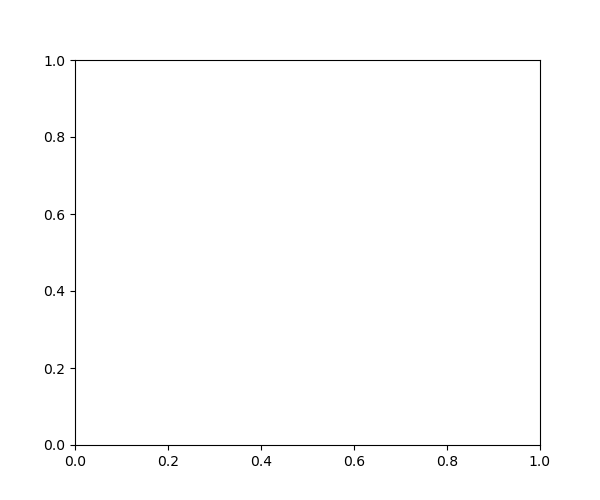

In [12]:
marker = 2.5

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='o', markersize = marker, linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue, label = "Experimental data")
ax = tools.plot_model(ax, "RC", avg_freq, avg_amp, sigma = std_amp)
#ax = tools.plot_model(ax, "sec_ord", avg_freq, avg_amp, sigma = std_amp, p0 = fit_params)

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()
fig.savefig(f"{manip[-1].fig_folder}/bode_model.png", dpi=300)

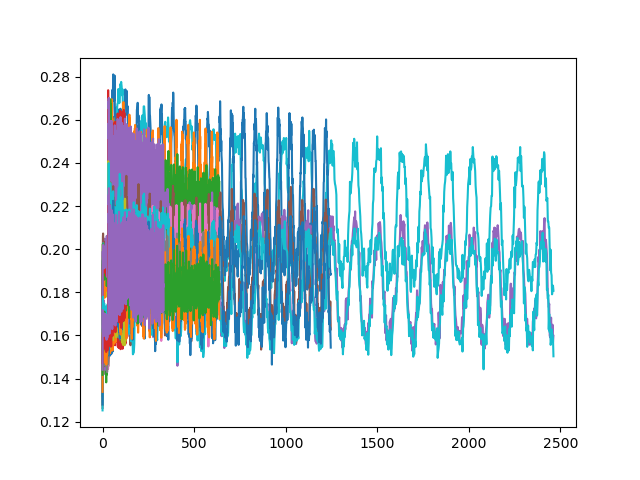

In [ ]:
fig, ax = plt.subplots()
F_stat_norm = []

for repeat in manip:
    aux = np.empty((1,0))
    for record in record_list:
        index = record_list.index(record)
        ax.plot(repeat.clean_times[index], repeat.clean_data[index],label = f"{frequency_list[index]} Hz")
        aux = np.append(aux, repeat.clean_data[index][9:30])
    F_stat_norm.append(np.mean(aux, axis = 0)) 

In [ ]:
F_stat_norm[::]

[0.1919643492063492, 0.15883574603174602, 0.15535019047619048]

In [ ]:
aux = np.empty((1,0))
aux

array([], shape=(1, 0), dtype=float64)

In [ ]:
[0.2191753015873016, 0.1919643492063492, 0.15883574603174602, 0.15535019047619048]